PROBLEM STATEMENT:BANK CUSTOMER EXIT PREDICTION

BACKGROUND:

Customer exit,or the loss of clients,is a critical challange for banks,as acquiring new customers is significantly more expensive than retaining existing ones.Identifying customers who are likely to exit allows banks to take proactive measures ,such as targeted retention strategies ,personalized offers ,or improved customer service , to reduce attrition and maintain profitability.

PROBLEM:

The goal of this project is to develop a machine learning model that predicts the likelihood of a customer leaving the bank based on historical data ,customer behavior,and demographic features.The model should analyze patterns and key indicators such as account balance,customer complaints,credit card scores and customer age demographics to classify customers as either exited or not exited with high accuracy.

OBJECTIVES:

1.Data Analysis:Explore historical customer data to identify key factors influencing customer exit(e.g...inactivity,low satisfaction scores ,complaints)

2.Model Development:Build and compare supervised learning algorithms (Random Forest,XGBoost) to predict exit probabillity.

3.Evaluation:Optimize the model using metrics like precision,recall,F1-score, and AUV_ROC to minimise false negatives(missed exit risks).

4.Actionable Insights:Provide the bank with a tool to flag high_risk customers,enabling timely retention efforts.

EXPECTED OUTCOMES:

An ML model that accurately predicts customer exit , helping banks reduce attrition rates,improve customer loyalty and enhance revenue stability.

KEY CHALLANGES:

1.Handling imbaalanced datasets (few exit cases vs non exit cases )

2.Ensuring interpretability for business decisions.

3.Incorporating real-time data for dynamic predictions.

IMPACT:

Successful customer exit prediction can save the bank millions in lost revenue by retaining customers before they switch to competitors.



DATA PREPROCESSING

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.metrics import PrecisionRecallDisplay,average_precision_score,classification_report,roc_auc_score

In [2]:
#Loading the dataset
bank_data=pd.read_csv("Customer-Churn-Records.csv")

In [3]:
#checking the first 5 rows of dataset
bank_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
#checking the last 5 rows of the dataset
bank_data.tail(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [5]:
#Print rows containing null values
bank_data[bank_data.isnull().any(axis=1)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned


In [6]:
#Check the information on dataset i.e presence of missing values,the data types
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
#Replace white space in columns with an underscore for easy accessibility
bank_data.columns=bank_data.columns.str.replace(' ', '_')
#Convert all columns to lowercase for easy coding
bank_data.columns=bank_data.columns.str.lower()
#confirm columns conversion
bank_data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited', 'complain',
       'satisfaction_score', 'card_type', 'point_earned'],
      dtype='object')

In [8]:
#Proper naming of columns for clarity
bank_data.rename(columns={'customerid':'customer_id',"rownumber":"row_number",
                          "creditscore":"credit_score","numofproducts":"total_products","hascrcard":"credit_card",
                          "isactivemember":"active_member","estimatedsalary":"estimated_salary"},inplace=True)

In [9]:
#Drop columns that are not necessary for this study
bank_data.drop(columns=(["row_number","customer_id","surname"]),inplace=True)

In [10]:
#Check total number of rows and columns
bank_data.shape

(10000, 15)

In [11]:
#Summary statistics for numerical columns
bank_data.describe()

,credit_score,age,tenure,balance,total_products,credit_card,active_member,estimated_salary,exited,complain,satisfaction_score,point_earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [12]:
#Check if there are any duplicated rows
bank_data.duplicated().sum()

np.int64(0)

In [13]:
#Check unique values 
bank_data.balance.unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79], shape=(6382,))

In [14]:
#check target variable distribution 
bank_data.exited.value_counts()

exited
0    7962
1    2038
Name: count, dtype: int64

In [15]:
#check Gender distribution in dataset
bank_data.gender.value_counts()

gender
Male      5457
Female    4543
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS

VISUALISATION

1.Visualisation of numerical columns & categorical columns

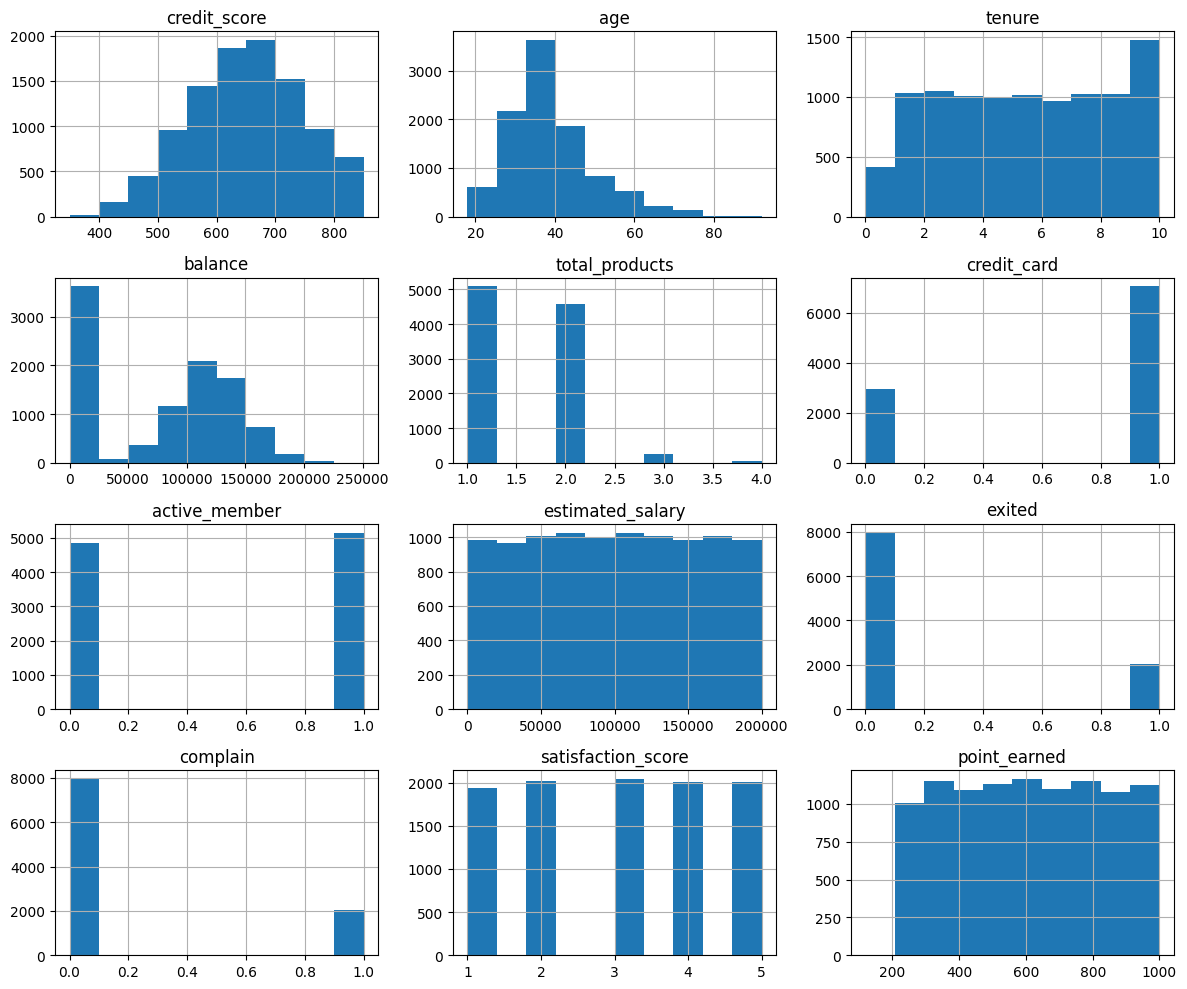

In [16]:
#Select numerical columns
numerical_cols = bank_data.select_dtypes(include=['int64', 'float64']).columns
#Plot the distributin of numerical columns
bank_data[numerical_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

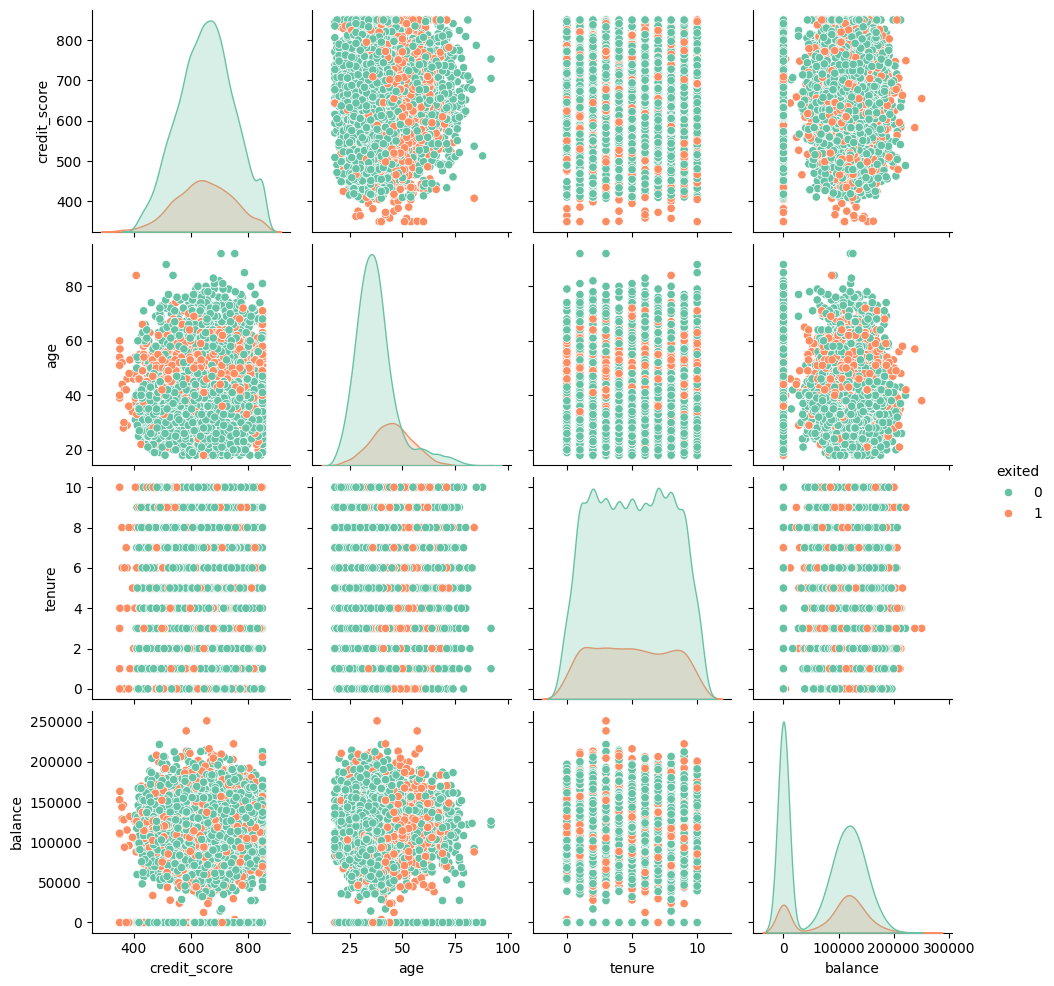

In [17]:
#plot a pairplot of relationship between credit score,age,tenure and balance against our target variable(exited)
sns.pairplot(bank_data,hue="exited",vars=['credit_score', 'age', 'tenure', 'balance'],palette="Set2")
plt.show()

VISUALIZATION OF RELATIONSHIP BETWEEN AGE AND EXITING CUSTOMERS

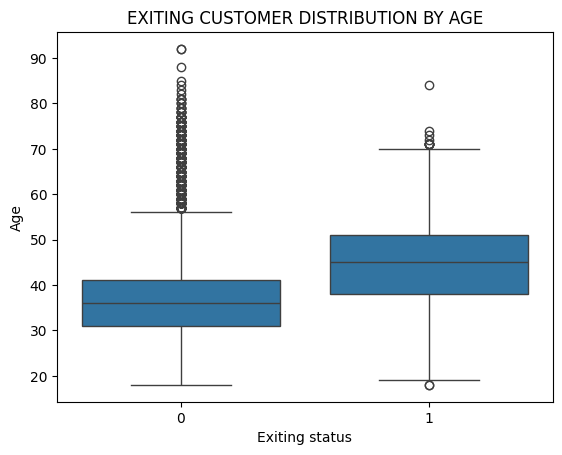

In [18]:
#plot of Age and existed relationship
plt.Figure(figsize=(16,9))
sns.boxplot(x="exited",y="age",data=bank_data)
plt.title("EXITING CUSTOMER DISTRIBUTION BY AGE")
plt.xlabel("Exiting status")
plt.ylabel("Age")
plt.show()

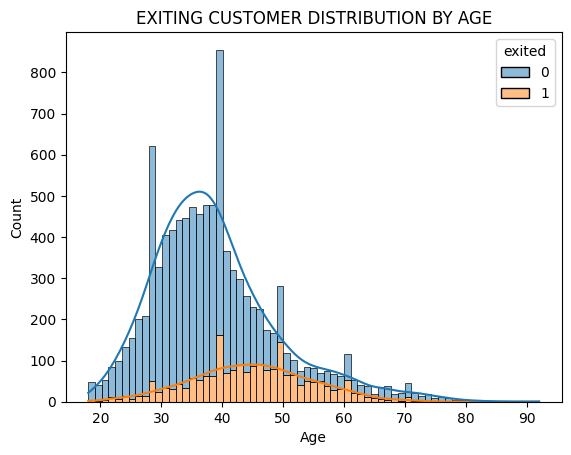

In [19]:
plt.Figure(figsize=(16,14))
sns.histplot(x=bank_data["age"],hue=bank_data["exited"],kde=True,multiple="stack")
plt.title("EXITING CUSTOMER DISTRIBUTION BY AGE")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [20]:
#Check unique values in the age column
bank_data.age.unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [21]:
#Creating age group column to reduce outlies in the age column
lst = [bank_data]
for column in lst:
    column.loc[column["age"] < 30 , "age_group" ] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), "age_group"] = 30
    column.loc[(column["age"] >= 40 ) & (column["age"] <= 49), "age_group"] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <=59), "age_group"] = 50
    column.loc[(column["age"] >= 60) & (column["age"] <=69), "age_group"] = 60
    column.loc[(column["age"] >= 70) & (column["age"] <=79), "age_group"] = 70
    column.loc[(column["age"] >= 80) & (column["age"] <=89), "age_group"] = 80
    column.loc[column["age"] >= 90, "age_group"]=90

In [22]:
#Check data types
bank_data.dtypes

credit_score            int64
geography              object
gender                 object
age                     int64
tenure                  int64
balance               float64
total_products          int64
credit_card             int64
active_member           int64
estimated_salary      float64
exited                  int64
complain                int64
satisfaction_score      int64
card_type              object
point_earned            int64
age_group             float64
dtype: object

In [23]:
#Transform the new age column into an integer
bank_data["age_group"]=bank_data["age_group"].astype(int)

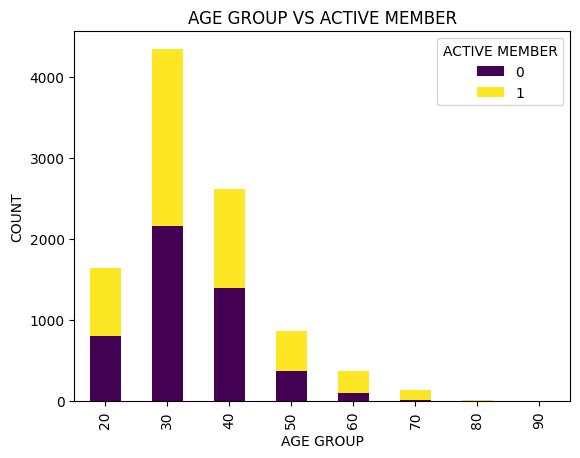

In [24]:
#plot age group against activity to see if there are patterns
cross_tab=pd.crosstab(bank_data["age_group"],bank_data["active_member"])
cross_tab.plot(kind="bar",stacked=True,colormap="viridis")
plt.title("AGE GROUP VS ACTIVE MEMBER")
plt.xlabel("AGE GROUP")
plt.ylabel("COUNT") 
plt.legend(title="ACTIVE MEMBER")
plt.show()

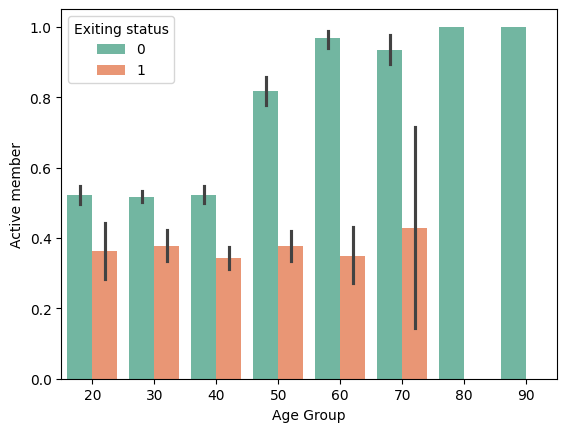

In [25]:
#plot age, member activity against exited 
sns.barplot(x="age_group",y="active_member",hue="exited",data=bank_data,palette="Set2")
plt.xlabel("Age Group")
plt.ylabel("Active member")
plt.legend(title="Exiting status")
plt.show()

VISUALIZATION OF SATISFACTION SCORES AND EXITING STATUS

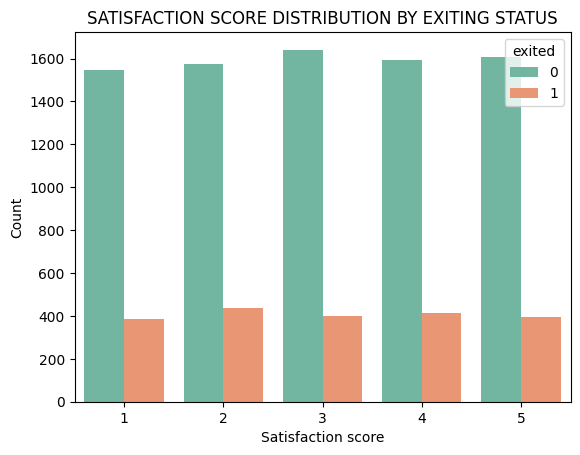

In [26]:
plt.Figure(figsize=(16,14))
sns.countplot(x=bank_data["satisfaction_score"],hue=bank_data["exited"],palette="Set2")
plt.title("SATISFACTION SCORE DISTRIBUTION BY EXITING STATUS")
plt.xlabel("Satisfaction score")
plt.ylabel("Count")
plt.show()

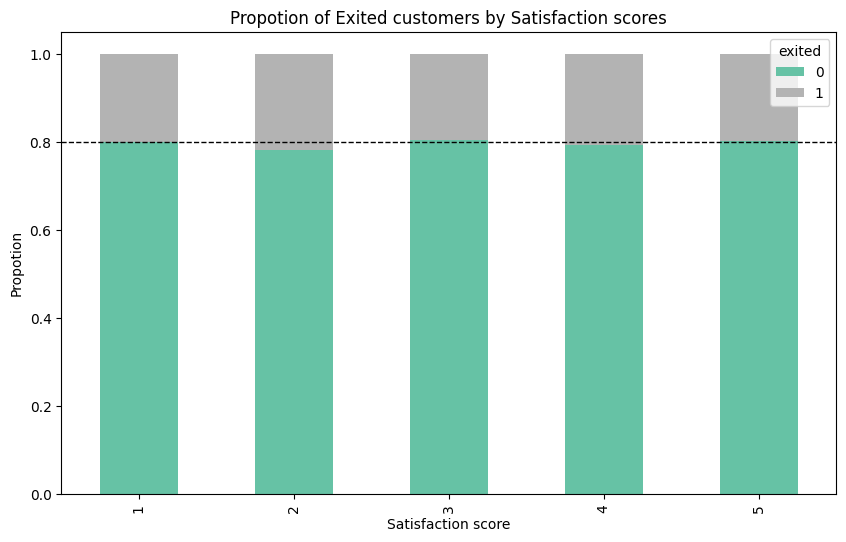

In [27]:
#create a propotion of dataset
propotion=bank_data.groupby(["satisfaction_score","exited"]).size().unstack()
propotion_df=propotion.div(propotion.sum(axis=1),axis=0)
#plot the propotion of exited and satisfaction scores
propotion_df.plot(kind="bar",stacked=True,figsize=(10,6),colormap="Set2")
plt.title("Propotion of Exited customers by Satisfaction scores")
plt.xlabel("Satisfaction score")
plt.ylabel("Propotion")
plt.axhline(y=0.8, linewidth=1, color="k", linestyle='--')
plt.show()

VISUALISATION OF RELATIONSHIP BETWEEN SALARY ESTIMATES AND EXITING STATUS

C:\Users\User\AppData\Local\Temp\ipykernel_12964\1027133790.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Exiting status")


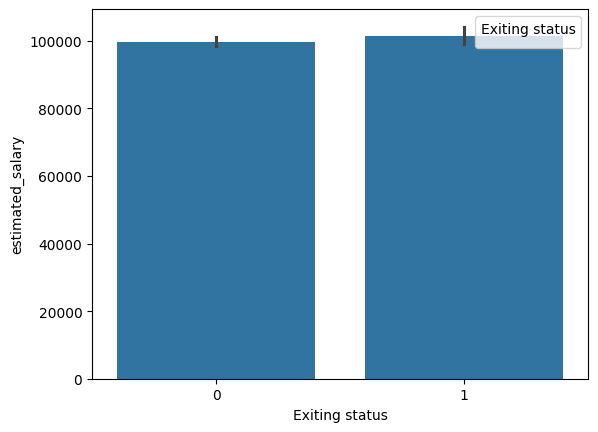

In [28]:
#Plot relationship between salary estimates and exited status
sns.barplot(x="exited",y="estimated_salary",data=bank_data)
plt.xlabel("Exiting status")
plt.legend(title="Exiting status")
plt.show()

VISUALIZATION OF RELATIONSHIP BETWEEN GENDER AND EXITING STATUS OF CUSTOMERS

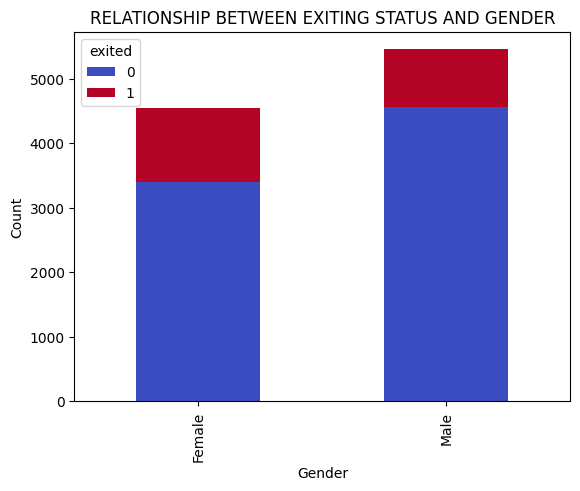

In [29]:
cross_tab=pd.crosstab(bank_data["gender"],bank_data["exited"])
cross_tab.plot(kind="bar",stacked=True,colormap="coolwarm")
plt.title("RELATIONSHIP BETWEEN EXITING STATUS AND GENDER")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

VISUALISATION OF RELATIONSHIP BETWEEN POINT EARNED AND EXITING STATUS

C:\Users\User\AppData\Local\Temp\ipykernel_12964\3492822878.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Exiting status")


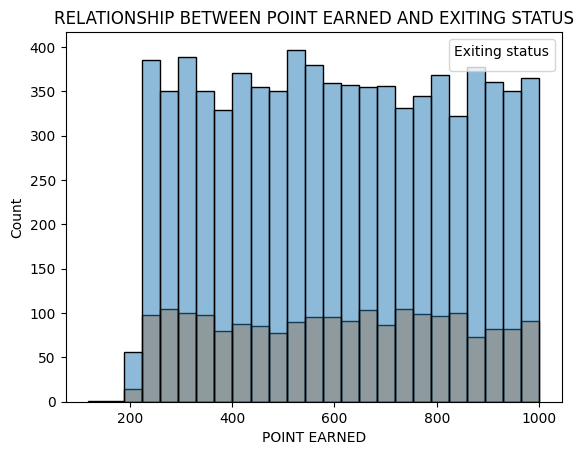

In [30]:
sns.histplot(x="point_earned",hue="exited",data=bank_data)
plt.title("RELATIONSHIP BETWEEN POINT EARNED AND EXITING STATUS")
plt.xlabel("POINT EARNED")
plt.legend(title="Exiting status")
plt.show()


VISUALISATION OF EXIT STATUS BEHAVIOUR BY GEOGRAPHICAL LOCATION

In [31]:
#Check unique values in the geography column
bank_data.geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [32]:
#Group data by gegraphy and get counts of each exit category 
geographical_exit=bank_data.groupby("geography")["exited"].value_counts().unstack()
#Reset index to make geography a column again
geographical_exit=geographical_exit.reset_index()
print(geographical_exit)


exited geography     0    1
0         France  4203  811
1        Germany  1695  814
2          Spain  2064  413


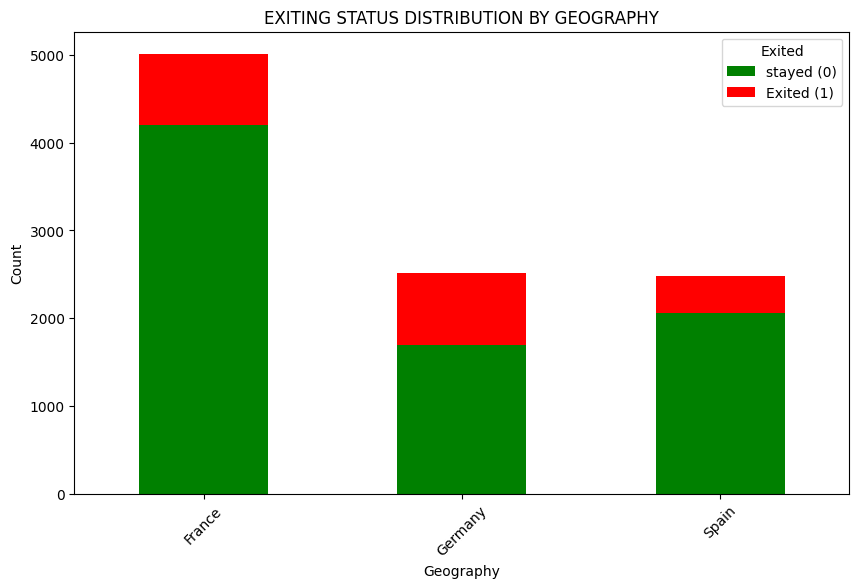

In [33]:
#plot relationship between exited status and geography
geographical_exit.set_index("geography").plot(kind="bar",stacked=True,figsize=(10,6),color=["green","red"])
plt.title("EXITING STATUS DISTRIBUTION BY GEOGRAPHY")
plt.xlabel("Geography")
plt.ylabel("Count")
plt.legend(title="Exited",labels=["stayed (0)","Exited (1)"])
plt.xticks(rotation=45)
plt.show()

In [34]:
#Create variable credit exit rate
credit_exit=bank_data.groupby("credit_score")["exited"].mean().reset_index()

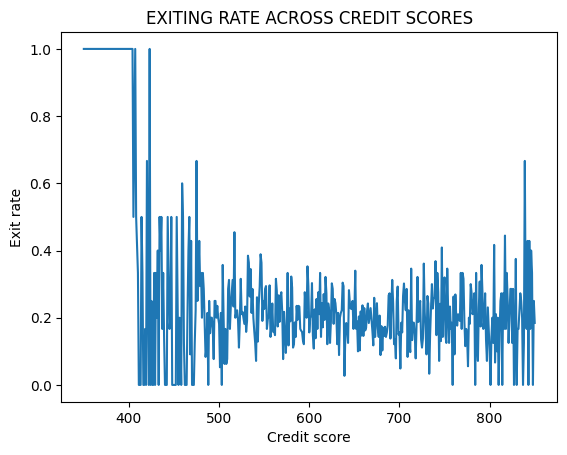

In [35]:
#plot credit exit rate across credit scores
plt.Figure(figsize=(16,14))
sns.lineplot(data=credit_exit,x="credit_score",y="exited")
plt.title("EXITING RATE ACROSS CREDIT SCORES")
plt.xlabel("Credit score")
plt.ylabel("Exit rate")
plt.show()

VISUALISATION OF CORRELATION BETWEEN NUMERICAL COLUMNS AND EXITED

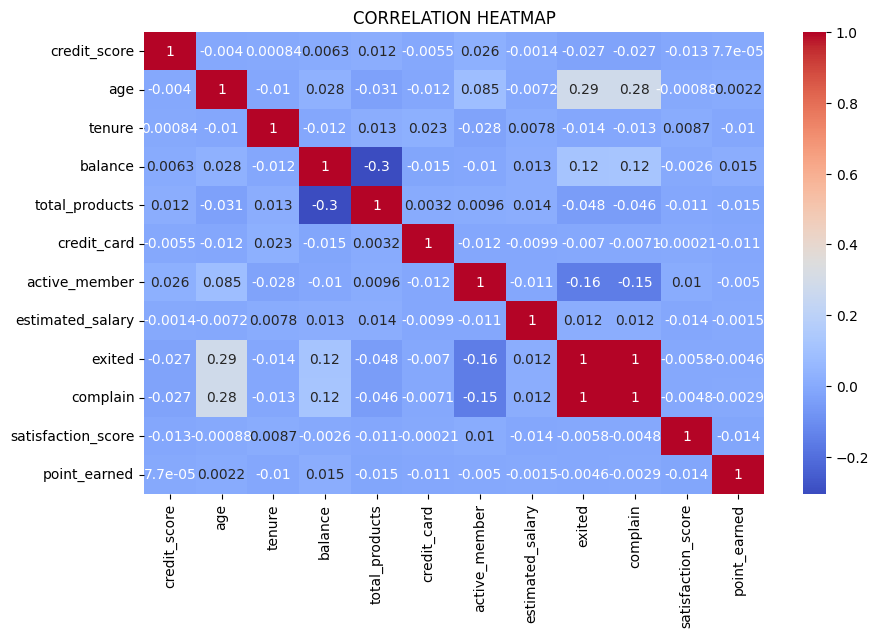

In [36]:
#calculate correlations of numerical columns
correlation=bank_data[numerical_cols].corr()
#plot a heatmap to show correlations
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title("CORRELATION HEATMAP")
plt.show()

FEATURE ENGINEERING

In [37]:
#Identify customers with low savings relative to income
bank_data["salary_balance_ratio"]=bank_data["estimated_salary"]/(bank_data["balance"] + 1e-6)
#Flag  high value customers at risk
bank_data["inactive_premium"]=((bank_data["active_member"]==0) & (bank_data["card_type"].isin(["GOLD","PLATINUM","DIAMOND"]))).astype(int)
#financial stability score 
bank_data["financial_stability"] =(bank_data["credit_score"]/850 + bank_data["estimated_salary"]/bank_data["estimated_salary"].max())/2
#complain to satisfaction ratio
bank_data["complaint_impact"]=bank_data["complain"]* (5 - bank_data["satisfaction_score"])


SCALING AND ENCODING OF DATASET IN PREPARATION OF MACHINE LEARNING

In [38]:
#show the first few rows of dataset
bank_data.head()

,credit_score,geography,gender,age,tenure,balance,total_products,credit_card,active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned,age_group,salary_balance_ratio,inactive_premium,financial_stability,complaint_impact
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,40,1.013489e+11,0,0.617499,3
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,40,1.342864e+00,0,0.639014,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,40,7.135851e-01,1,0.580134,2
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,30,9.382663e+10,1,0.645752,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,40,6.300979e-01,0,0.697718,0


In [39]:
#check for null values
bank_data.isnull().sum()

credit_score            0
geography               0
gender                  0
age                     0
tenure                  0
balance                 0
total_products          0
credit_card             0
active_member           0
estimated_salary        0
exited                  0
complain                0
satisfaction_score      0
card_type               0
point_earned            0
age_group               0
salary_balance_ratio    0
inactive_premium        0
financial_stability     0
complaint_impact        0
dtype: int64

In [40]:
#drop the created age group column
bank_data=bank_data.drop(columns=["age"])

In [41]:
#prepare our columns for preprocessing by segregation based on the different transformation they are to undertake
one_hot_cols=["gender","geography"]
ordinal_cols=["card_type"]
hierarchy=["SILVER","GOLD","PLATINUM","DIAMOND"]
scaling_cols=["balance","estimated_salary","credit_score","point_earned","salary_balance_ratio","financial_stability"]
other_cols=["tenure","total_products","credit_card","age_group","active_member","exited","complain","satisfaction_score","inactive_premium","complaint_impact"]
#create a column transformer of all transformations to be done on dataset
preprocessor=ColumnTransformer(transformers=[("onehot",OneHotEncoder(),one_hot_cols),
                                             ("ordinal",OrdinalEncoder(categories=[hierarchy]),ordinal_cols),
                                             ("scaler",StandardScaler(),scaling_cols)],remainder="passthrough")
#apply transformation of dataset columns
bank_data_processed=preprocessor.fit_transform(bank_data)
#extract feature names from preprocessor for columns
feature_names=list(preprocessor.get_feature_names_out())
#create a dataframe of the new processed dataset
bank_data_transformed=pd.DataFrame(bank_data_processed,columns=feature_names)

In [42]:
#check first few rows of dataset
bank_data_transformed.head()

,onehot__gender_Female,onehot__gender_Male,onehot__geography_France,onehot__geography_Germany,onehot__geography_Spain,ordinal__card_type,scaler__balance,scaler__estimated_salary,scaler__credit_score,scaler__point_earned,...,remainder__tenure,remainder__total_products,remainder__credit_card,remainder__active_member,remainder__exited,remainder__complain,remainder__satisfaction_score,remainder__age_group,remainder__inactive_premium,remainder__complaint_impact
0,1.0,0.0,1.0,0.0,0.0,3.0,-1.225848,0.021886,-0.326221,-0.630839,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,40.0,0.0,3.0
1,1.0,0.0,0.0,0.0,1.0,3.0,0.117350,0.216534,-0.440036,-0.666251,...,1.0,1.0,0.0,1.0,0.0,1.0,3.0,40.0,0.0,2.0
2,1.0,0.0,1.0,0.0,0.0,3.0,1.333053,0.240687,-1.536794,-1.015942,...,8.0,3.0,1.0,0.0,1.0,1.0,3.0,40.0,1.0,2.0
3,1.0,0.0,1.0,0.0,0.0,1.0,-1.225848,-0.108918,0.501521,-1.135457,...,1.0,2.0,0.0,0.0,0.0,0.0,5.0,30.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.785728,-0.365276,2.063884,-0.803472,...,2.0,1.0,1.0,1.0,0.0,0.0,5.0,40.0,0.0,0.0


In [43]:
#check number of rows and columns in dataset 
bank_data_transformed.shape

(10000, 22)

In [44]:
#Check dataset columns
bank_data_transformed.columns

Index(['onehot__gender_Female', 'onehot__gender_Male',
       'onehot__geography_France', 'onehot__geography_Germany',
       'onehot__geography_Spain', 'ordinal__card_type', 'scaler__balance',
       'scaler__estimated_salary', 'scaler__credit_score',
       'scaler__point_earned', 'scaler__salary_balance_ratio',
       'scaler__financial_stability', 'remainder__tenure',
       'remainder__total_products', 'remainder__credit_card',
       'remainder__active_member', 'remainder__exited', 'remainder__complain',
       'remainder__satisfaction_score', 'remainder__age_group',
       'remainder__inactive_premium', 'remainder__complaint_impact'],
      dtype='object')

In [45]:
#rename columns from the preprocessor names to new column names
bank_data_transformed=bank_data_transformed.rename(columns={'onehot__gender_Female':"female", 'onehot__gender_Male':"male",
       'onehot__geography_France':"France", 'onehot__geography_Germany':"Germany",
       'onehot__geography_Spain':"Spain", 'ordinal__card_type':"card_type", 'scaler__balance':"balance",
       'scaler__estimated_salary':"estimated_salary", 'scaler__credit_score':"credit_score",
       'scaler__point_earned':"point_earned", 'scaler__salary_balance_ratio':"salary_balance_ratio",
       'scaler__financial_stability':"financial_stability", 'remainder__age_group':"age_group", 'remainder__tenure':"tenure",
       'remainder__total_products':"total_products", 'remainder__credit_card':"credit_card",
       'remainder__active_member':"active_member", 'remainder__exited':"exited", 'remainder__complain':"complain",
       'remainder__satisfaction_score':"satisfaction_score", 'remainder__inactive_premium':"inactive_premium",
       'remainder__complaint_impact':"complaint_impact"
       })

In [46]:
#check first few rows of dataset
bank_data_transformed.head()

,female,male,France,Germany,Spain,card_type,balance,estimated_salary,credit_score,point_earned,...,tenure,total_products,credit_card,active_member,exited,complain,satisfaction_score,age_group,inactive_premium,complaint_impact
0,1.0,0.0,1.0,0.0,0.0,3.0,-1.225848,0.021886,-0.326221,-0.630839,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,40.0,0.0,3.0
1,1.0,0.0,0.0,0.0,1.0,3.0,0.117350,0.216534,-0.440036,-0.666251,...,1.0,1.0,0.0,1.0,0.0,1.0,3.0,40.0,0.0,2.0
2,1.0,0.0,1.0,0.0,0.0,3.0,1.333053,0.240687,-1.536794,-1.015942,...,8.0,3.0,1.0,0.0,1.0,1.0,3.0,40.0,1.0,2.0
3,1.0,0.0,1.0,0.0,0.0,1.0,-1.225848,-0.108918,0.501521,-1.135457,...,1.0,2.0,0.0,0.0,0.0,0.0,5.0,30.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.785728,-0.365276,2.063884,-0.803472,...,2.0,1.0,1.0,1.0,0.0,0.0,5.0,40.0,0.0,0.0


In [47]:
#drop the complain column
bank_data_transformed=bank_data_transformed.drop(columns="complain",axis=1)

In [48]:
#Checking for exit distribution to check for class imbalance
exit_rate=bank_data_transformed["exited"].value_counts(normalize=True)*100
print(f"Customer exit rate: {exit_rate}")

Customer exit rate: exited
0.0    79.62
1.0    20.38
Name: proportion, dtype: float64


In [49]:
#Assign the exited column as target variable
y=bank_data_transformed["exited"]
#assign all the other columns excluding exited as our features
x=bank_data_transformed.drop(columns="exited",axis=1)

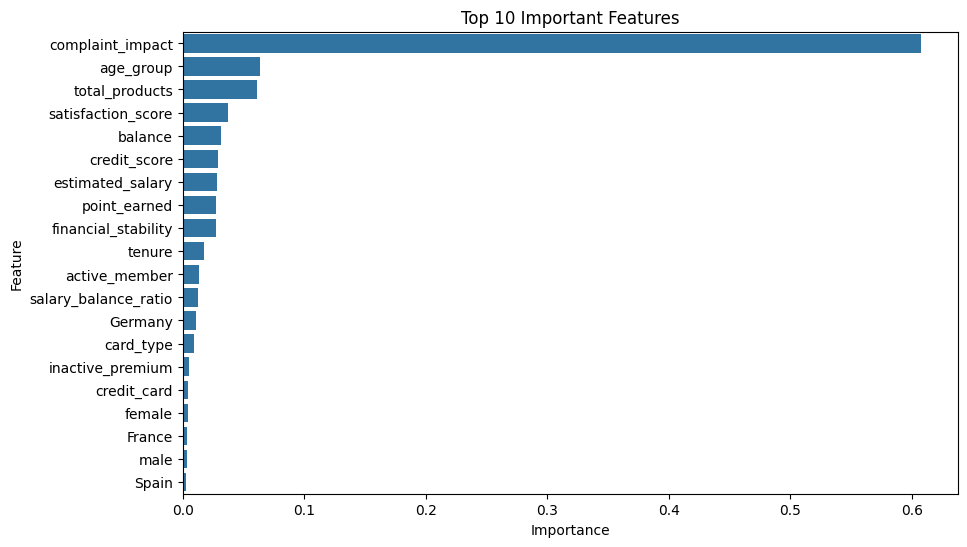

In [76]:
#define model
model = RandomForestClassifier()
#fit model on our x and y variable
model.fit(x, y)
#check for feature importance to model performance
importance = pd.DataFrame({'Feature': x.columns, 'Importance': model.feature_importances_})
importance = importance.sort_values('Importance', ascending=False)
#plot importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Top 10 Important Features')
plt.show()


In [51]:
#split dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [52]:
#checking for rows and columns of training and testing set
x_train.shape,x_test.shape

((8000, 20), (2000, 20))

MODEL 1

In [53]:
#model creation
model_1=RandomForestClassifier(class_weight='balanced_subsample',max_depth=5,min_samples_leaf=50)
#fitting model on training set
model_1.fit(x_train,y_train)
#using model to predict test set
predictions_1=model_1.predict(x_test)

AP SCORE: 0.8540809018567639
ROC SCORE: 0.9312185929648241


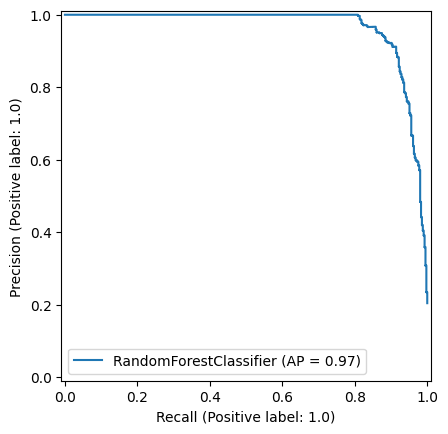

In [54]:
#measure of trade off between precision and recall
PrecisionRecallDisplay.from_estimator(model_1,x_test,y_test)
print("AP SCORE:",average_precision_score(y_test,predictions_1))
print("ROC SCORE:",roc_auc_score(y_test,predictions_1))

In [55]:
#Classification report for Model1
report=classification_report(y_test,predictions_1)
print(report)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1592
         1.0       0.95      0.88      0.91       408

    accuracy                           0.96      2000
   macro avg       0.96      0.93      0.94      2000
weighted avg       0.96      0.96      0.96      2000



In [56]:
from sklearn.metrics import confusion_matrix
#confusion matrix to show models predictability
print(confusion_matrix(y_test, predictions_1))


[[1572   20]
 [  51  357]]


True negative:Model correctly predicted 1581 customers who did not exit

True negative:Model correctly predicted 353 customers who exited

False positive:Model incorrectly flagged 11 customers who did not exit as those who exited

False positive:Model incorrectly flagged 55 customers who exited as those who did not exit

ALTERNATIVE MODEL 2

In [ ]:
#Calculate weight ratio between exited and non exited 
scale_pos_weight=len(y_train[y_train==0])/len(y_train[y_train==1])

3.9079754601226995


In [58]:
#split training dataset to get validation set
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train,random_state=42)

In [74]:
#create model
model_2=XGBClassifier(scale_pos_weight=scale_pos_weight,#handles class imbalance
                      eval_metric="aucpr", #optimises for precision recall
                      early_stopping_rounds=50,random_state=42#prevent overfitting
                      )
#fit model on training data
model_2.fit(x_train,y_train,eval_set=[(x_val,y_val)],verbose=True)
#Use model to predict the testing set
predictions_2=model_2.predict(x_test)

[0]	validation_0-aucpr:0.96729
[1]	validation_0-aucpr:0.96894
[2]	validation_0-aucpr:0.97023
[3]	validation_0-aucpr:0.97120
[4]	validation_0-aucpr:0.97314
[5]	validation_0-aucpr:0.97385
[6]	validation_0-aucpr:0.97374
[7]	validation_0-aucpr:0.97394
[8]	validation_0-aucpr:0.97456
[9]	validation_0-aucpr:0.97442
[10]	validation_0-aucpr:0.97389
[11]	validation_0-aucpr:0.97434
[12]	validation_0-aucpr:0.97475
[13]	validation_0-aucpr:0.97683
[14]	validation_0-aucpr:0.97696
[15]	validation_0-aucpr:0.97724
[16]	validation_0-aucpr:0.98055
[17]	validation_0-aucpr:0.97920
[18]	validation_0-aucpr:0.97829
[19]	validation_0-aucpr:0.97785
[20]	validation_0-aucpr:0.97986
[21]	validation_0-aucpr:0.97915
[22]	validation_0-aucpr:0.97856
[23]	validation_0-aucpr:0.97768
[24]	validation_0-aucpr:0.97822
[25]	validation_0-aucpr:0.97829
[26]	validation_0-aucpr:0.97807
[27]	validation_0-aucpr:0.97676
[28]	validation_0-aucpr:0.97684
[29]	validation_0-aucpr:0.97673
[30]	validation_0-aucpr:0.97653
[31]	validation_0-

In [75]:
#Confusion matrix to check models predictability
print(confusion_matrix(y_test, predictions_2))

[[1533   59]
 [  33  375]]


In [73]:
print("AP SCORE:",average_precision_score(y_test,predictions_2))
print("ROC SCORE:",roc_auc_score(y_test,predictions_2))

AP SCORE: 0.8106684738411493
ROC SCORE: 0.9410286727756428


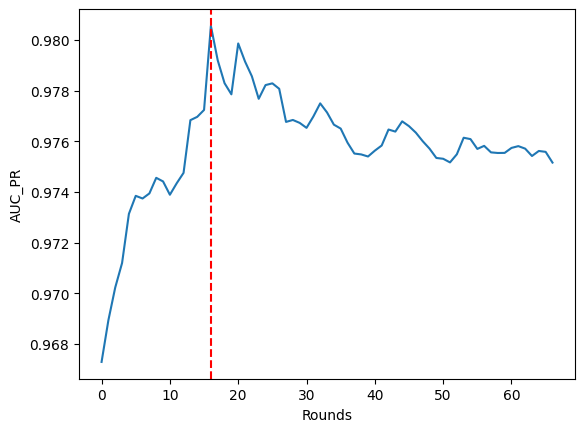

In [62]:
#plot model evaluation results to find best iteration for early stopping
results=model_2.evals_result()
plt.plot(results["validation_0"]["aucpr"])
plt.axvline(model_2.best_iteration,color="red",linestyle="--")
plt.xlabel("Rounds")
plt.ylabel("AUC_PR")
plt.show()

COMBINED MODELS

In [63]:
combined_predictions=np.column_stack((predictions_1,predictions_2))
print(combined_predictions)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


OPTIMIZATION AND HYPERPARAMETER TUNING

TUNING RANDOM FOREST CLASSIFIER

In [64]:
#define parameters for tuning
param={"n_estimators":[100,200,300,1000],
       "max_depth":[5,10,15, None],
       "min_samples_split":[2,5,10],
       "min_samples_leaf":[1,2,4],
       "class_weight":["balanced","balanced_subsample"]}
#define model
model=RandomForestClassifier(random_state=42)
model_randomized=RandomizedSearchCV(estimator=model,param_distributions=param,n_iter=20,
                                    cv=5,scoring="average_precision",random_state=42)
model_randomized.fit(x_train,y_train)
print("Best parameters:",model_randomized.best_params_)

Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'class_weight': 'balanced'}


In [65]:
#return best parameters
best_params=model_randomized.best_params_
#define model using returned best parameters
tuned_model_1=RandomForestClassifier(**best_params)
tuned_model_1.fit(x_train,y_train)
randomforest_predictions=tuned_model_1.predict(x_test)
print("Test AUC-PR:",average_precision_score(y_test,randomforest_predictions))
print("ROC SCORE:",roc_auc_score(y_test,randomforest_predictions))



Test AUC-PR: 0.8700963341858483
ROC SCORE: 0.9325056655828161


In [66]:
#Print confusion matrix for the model
print(confusion_matrix(y_test,randomforest_predictions))

[[1580   12]
 [  52  356]]


TUNING XGB MODEL

In [67]:
#define parameters for xgb tuning
params={"n_estimators":np.arange(100,1000),
        "max_depth":np.arange(3,10),
        "learning_rate": [0.001,0.01,0.05,0.1,0.2],
        "subsample":np.linspace(0.6,1.0,5), 
        "colsample_bytree":np.linspace(0.6,1.0,5),
        "gamma":np.linspace(0,5,6),
        "scale_pos_weight":[scale_pos_weight],
        "eval_metric":["aucpr","logloss"]
            }
#define model
xgb=XGBClassifier(
                  random_state=42,
                  early_stopping_rounds=50)
search=RandomizedSearchCV(estimator=xgb,
                          param_distributions=params,
                          n_iter=100,
                          cv=5,
                          scoring="average_precision",
                          verbose=3,
                          random_state=42,
                          n_jobs=-1
                          )
search.fit(x_train,y_train,eval_set=[(x_val,y_val)],verbose=False)
best_xgb_params=search.best_params_
print(best_xgb_params)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'subsample': np.float64(0.8), 'scale_pos_weight': 3.9079754601226995, 'n_estimators': np.int64(614), 'max_depth': np.int64(7), 'learning_rate': 0.01, 'gamma': np.float64(3.0), 'eval_metric': 'aucpr', 'colsample_bytree': np.float64(0.8)}


In [68]:
#Predict best xgb using best parameters
best_xgb=XGBClassifier(**best_xgb_params)
best_xgb.fit(x_train,y_train)
predictions_best_xgb=best_xgb.predict(x_test)
print("Test AUC-PR:",average_precision_score(y_test,predictions_best_xgb))
print("ROC SCORE:",roc_auc_score(y_test,predictions_best_xgb))
print("\nClassification Report:\n",classification_report(y_test,predictions_best_xgb))


Test AUC-PR: 0.8255824357912178
ROC SCORE: 0.9435412355897131

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1592
         1.0       0.88      0.92      0.90       408

    accuracy                           0.96      2000
   macro avg       0.93      0.94      0.94      2000
weighted avg       0.96      0.96      0.96      2000



In [69]:
print(confusion_matrix(y_test,predictions_best_xgb))

[[1541   51]
 [  33  375]]
